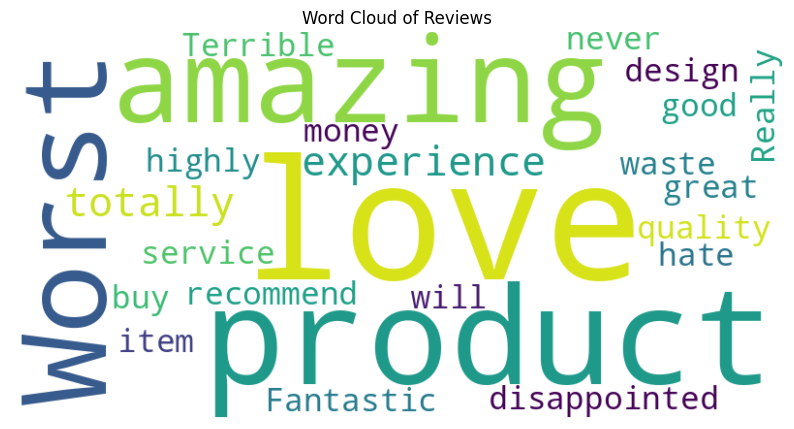

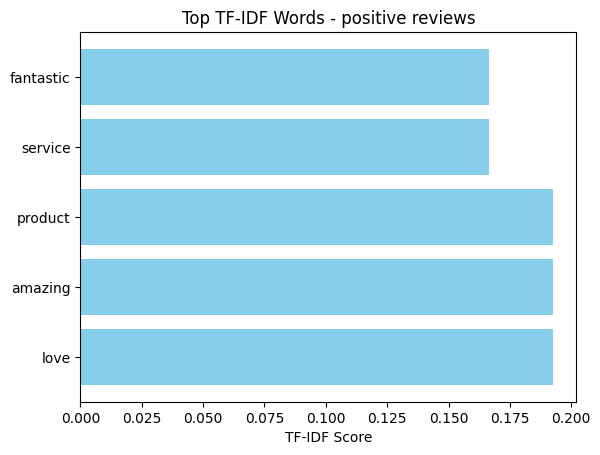

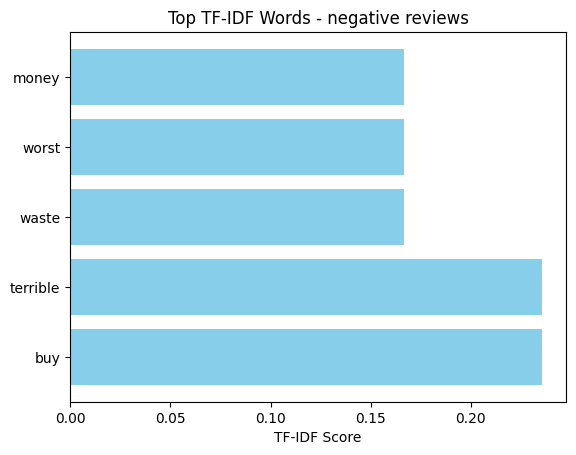

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

data = {
    "text": [
        "I love this product, it is amazing!",
        "Worst experience ever, totally disappointed.",
        "Really good quality and great design.",
        "I hate this item, waste of money.",
        "Fantastic service, highly recommend!",
        "Terrible, I will never buy this again."
    ],
    "label": ["positive", "negative", "positive", "negative", "positive", "negative"]
}
df = pd.DataFrame(data)

# ------------------------
# 2. Bag of Words (BOW)
# ------------------------
bow_vectorizer = CountVectorizer(stop_words="english")
bow_features = bow_vectorizer.fit_transform(df["text"])
bow_df = pd.DataFrame(bow_features.toarray(), columns=bow_vectorizer.get_feature_names_out())

# ------------------------
# 3. TF-IDF
# ------------------------
tfidf_vectorizer = TfidfVectorizer(stop_words="english")
tfidf_features = tfidf_vectorizer.fit_transform(df["text"])
tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# ------------------------
# 4. Word Cloud (common words)
# ------------------------
all_text = " ".join(df["text"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Reviews")
plt.show()

# ------------------------
# 5. Top TF-IDF words per class
# ------------------------
def plot_top_tfidf_words(label, n=5):
    # Filter texts for the given class
    texts = df[df["label"] == label]["text"]

    # Fit TF-IDF on that subset
    vec = TfidfVectorizer(stop_words="english")
    X = vec.fit_transform(texts)
    scores = X.toarray().mean(axis=0)

    # Get top n words
    top_indices = scores.argsort()[-n:][::-1]
    top_words = [(vec.get_feature_names_out()[i], scores[i]) for i in top_indices]

    # Plot
    words, values = zip(*top_words)
    plt.barh(words, values, color="skyblue")
    plt.xlabel("TF-IDF Score")
    plt.title(f"Top TF-IDF Words - {label} reviews")
    plt.show()

# Positive words
plot_top_tfidf_words("positive", n=5)

# Negative words
plot_top_tfidf_words("negative", n=5)
